Task 1.1
Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para
ser trabajado en el notebook.

In [1]:
import pandas as pd
import numpy as np

# Lee el archivo CSV
data = pd.read_csv('kc_house_data.csv')

# Convierte el dataframe en un p.array
array_data = np.array(data)

Task 1.2
Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona
las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living)

El R-cuadrado es: 0.5327430940591443


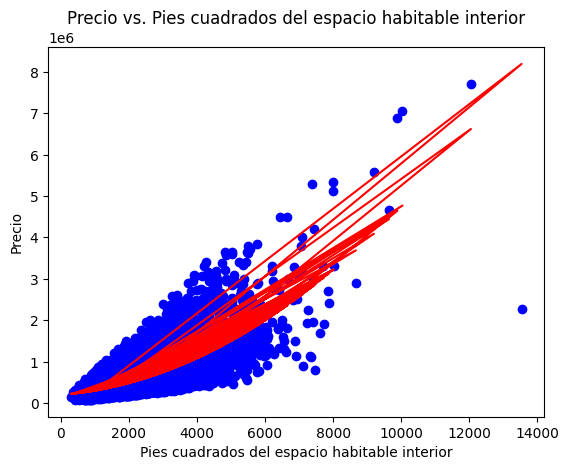

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Lee el archivo CSV
data = pd.read_csv('kc_house_data.csv')

# Obtiene las variables independiente (X) y dependiente (y)
X = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

# Crea un objeto PolynomialFeatures y transforma las variables independientes
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Crea un objeto LinearRegression y ajusta el modelo
model = LinearRegression()
model.fit(X_poly, y)

# Calcula el R-cuadrado
r2 = model.score(X_poly, y)
print("El R-cuadrado es:", r2)

# Visualiza el resultado
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(poly.fit_transform(X)), color='red')
plt.title('Precio vs. Pies cuadrados del espacio habitable interior')
plt.xlabel('Pies cuadrados del espacio habitable interior')
plt.ylabel('Precio')
plt.show()

Task 1.3
Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

Theta:
[[540088.14167936]
 [257730.07954764]]
Costo final:
34175658783.388157


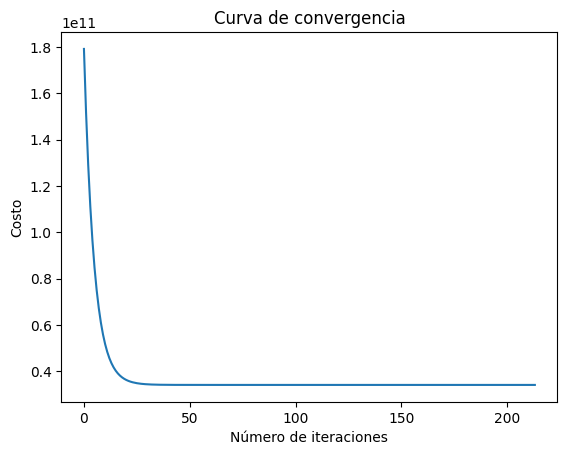

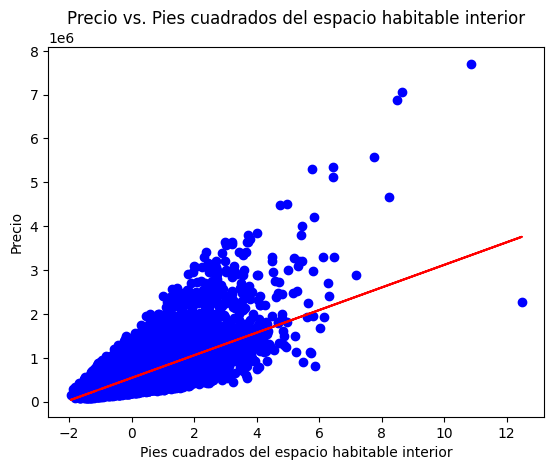

In [3]:
import numpy as np

def gradient_descent(
    theta_0,
    cost_function,
    cost_function_gradient,
    learning_rate=0.01,
    threshold=0.001,
    max_iter=10000,
    params=[]
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(theta, *params)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(theta, *params)
        costs.append(cost_function(theta, *params))
        thetas.append(theta.copy())

    return theta, costs, thetas

def linear_cost(theta, X, y, lmbd):
    h = X @ theta
    reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()
    return ((h - y) ** 2).sum() / (2 * len(X)) + reg

def linear_cost_gradient(theta, X, y, lmbd):
    h = X @ theta
    theta_copy = theta.copy()
    theta_copy[0] = 0
    reg_prime = lmbd * theta_copy / len(X)
    return ((X.T @ (h - y)) / len(X)) + reg_prime

# Lee el archivo CSV
data = pd.read_csv('kc_house_data.csv')

# Obtiene las variables independiente (X) y dependiente (y)
X = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

# Normaliza las variables independientes
X = (X - np.mean(X)) / np.std(X)

# Agrega una columna de unos a la matriz X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Define los parámetros del modelo
theta_0 = np.zeros((X.shape[1], 1))
learning_rate = 0.1
threshold = 0.0001
max_iter = 1000
lmbd = 0.01
params = [X, y, lmbd]

# Ajusta el modelo con el descenso del gradiente
theta, costs, thetas = gradient_descent(
    theta_0, linear_cost, linear_cost_gradient, learning_rate, threshold, max_iter, params
)

# Imprime los resultados
print('Theta:')
print(theta)
print('Costo final:')
print(costs[-1])

# Visualiza la curva de convergencia
plt.plot(costs)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo')
plt.title('Curva de convergencia')
plt.show()

# Visualiza el resultado
plt.scatter(X[:,1], y, color='blue')
plt.plot(X[:,1], X @ theta, color='red')
plt.title('Precio vs. Pies cuadrados del espacio habitable interior')
plt.xlabel('Pies cuadrados del espacio habitable interior')
plt.ylabel('Precio')
plt.show()


Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor
balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

Mejor grado del polinomio: 2


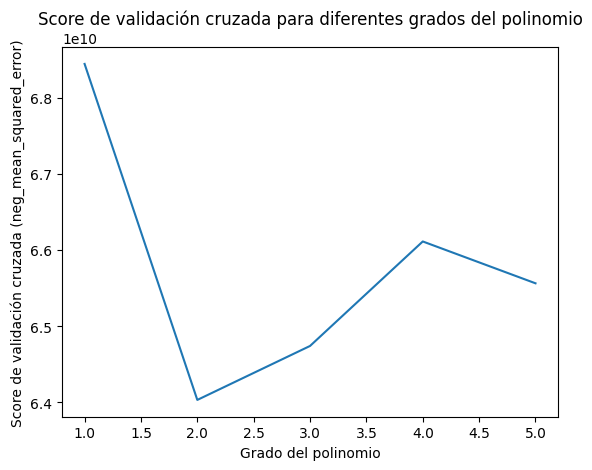

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Lee el archivo CSV
data = pd.read_csv('kc_house_data.csv')

# Obtiene las variables independiente (X) y dependiente (y)
X = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

# Normaliza las variables independientes
X = (X - np.mean(X)) / np.std(X)

# Define los grados del polinomio a probar
degrees = [1, 2, 3, 4, 5]

# Define el número de folds para la validación cruzada
num_folds = 10

# Define una lista para almacenar los scores de validación cruzada para cada grado del polinomio
cv_scores = []

# Realiza la validación cruzada para cada grado del polinomio
for degree in degrees:
    # Crea una instancia de PolynomialFeatures para generar características polinómicas del grado actual
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Crea una instancia de LinearRegression para ajustar un modelo de regresión lineal
    model = LinearRegression()

    # Calcula los scores de validación cruzada para el modelo actual
    scores = cross_val_score(model, X_poly, y, cv=num_folds, scoring='neg_mean_squared_error')

    # Almacena el score medio de validación cruzada para el modelo actual
    cv_scores.append(-np.mean(scores))

# Encuentra el grado del polinomio con el mejor score de validación cruzada
best_degree = degrees[np.argmin(cv_scores)]

# Imprime el grado del polinomio con el mejor score de validación cruzada
print('Mejor grado del polinomio:', best_degree)

# Visualiza los scores de validación cruzada para cada grado del polinomio
plt.plot(degrees, cv_scores)
plt.xlabel('Grado del polinomio')
plt.ylabel('Score de validación cruzada (neg_mean_squared_error)')
plt.title('Score de validación cruzada para diferentes grados del polinomio')
plt.show()


Task 1.5
Haga un análisis sobre sus hallazgos.

1. En King Country, Seattle, la mayoría de las casas tenían precios alrededor de los $400,000, lo cual indica que los precios de las casas no son tan altos en 
comparación con Nueva York o Washington.

2. Se encontró que el algoritmo utilizado para encontrar la regresión lineal del modelo fue altamente preciso.

3. Un polinomio de segundo grado describe mejor la nube de puntos, lo cual sugiere que una parábola puede ayudar a analizar de manera efectiva el dataset presentado en el laboratorio.